In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N=100 #number of neurons
sigma=0.2 #NOISE
pref_stims = np.linspace(-np.pi, np.pi, N)
PREF_ANG_DISTS = pref_stims - pref_stims[:,None]
PREF_ANG_DISTS = np.absolute(PREF_ANG_DISTS)

In [3]:
A=1 #Amplitude
omega=.7 #tuning width
sigma_i=0.05
sigma_s=np.random.normal(0, .4)
print (sigma_s)

-0.2428423462145454


In [4]:
def tuning_curve(pref_stim, stim):
    return A * np.exp( - (stim - pref_stim)**2 / (2 * omega**2) )

#independent and shared noise
def modify_matrix(matrix):
    for i in matrix:
        counter =0
        for j in i:
            i[counter] += np.random.normal(0, sigma_i)
            counter+=1
    return matrix

In [5]:
#distance based correlation matrix
def construct_corr_matrix(max_corr, corr_length, PREF_ANG_DISTS, N):
    return max_corr * (np.exp(-PREF_ANG_DISTS / corr_length) - np.eye(N)) + np.eye(N)

In [6]:
#covariance matrix
def construct_cov_matrix(max_corr, corr_length, PREF_ANG_DISTS, N):
    sigma=0.4
    corr_mtx = construct_corr_matrix(max_corr, corr_length, PREF_ANG_DISTS, N)
    stds_mtx = sigma * np.eye(N) # matrix of standard deviations
    return np.dot(stds_mtx, np.dot(corr_mtx, stds_mtx))

In [7]:
def tuning_curve_theta(pref_stim, opening_angle):
    return tuning_curve(pref_stim, opening_angle)

Text(0.5, 1.0, 'Population response')

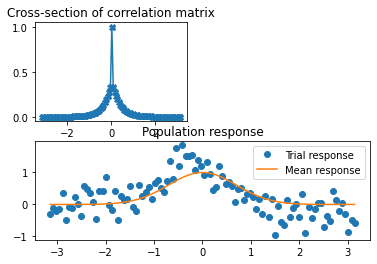

In [8]:
max_corr = 0.4
corr_length = 0.35

# Cross-section of correlation matrix
plt.subplot(221) 
corr_mtx = construct_corr_matrix(max_corr, corr_length, PREF_ANG_DISTS, N)
plt.plot(pref_stims, corr_mtx[50], '-X')
plt.title('Cross-section of correlation matrix')

# Population response
plt.subplot(212)
# sample population response
stim = 0
mean_pop_res = tuning_curve_theta(pref_stims, stim)
cov_mtx = construct_cov_matrix(max_corr, corr_length, PREF_ANG_DISTS, N)
pop_res = np.random.multivariate_normal(mean_pop_res, cov_mtx)
plt.plot(pref_stims, pop_res, 'o', label='Trial response')
plt.plot(pref_stims, mean_pop_res, label='Mean response')
plt.legend()
plt.title('Population response')

Text(0.5, 1.0, 'Cross-section of correlation matrix')

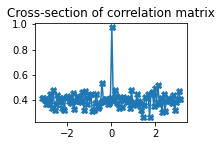

In [546]:
max_corr = .4
corr_length = .7

# Cross-section of correlation matrix
plt.subplot(221) 
corr_mtx = construct_corr_matrix(max_corr, corr_length, PREF_ANG_DISTS, N)
corr_mtx=modify_matrix(corr_mtx)
plt.plot(pref_stims, corr_mtx[50], '-X')
plt.title('Cross-section of correlation matrix')


Text(0.5, 1.0, 'Population response')

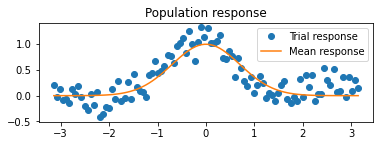

In [478]:
# Population response
plt.subplot(212)
# sample population response
stim = 0
mean_pop_res = tuning_curve_theta(pref_stims, stim)
cov_mtx = construct_cov_matrix(max_corr, corr_length, PREF_ANG_DISTS, N)
pop_res = np.random.multivariate_normal(mean_pop_res, cov_mtx)
plt.plot(pref_stims, pop_res, 'o', label='Trial response')
plt.plot(pref_stims, mean_pop_res, label='Mean response')
plt.legend()
plt.title('Population response')

In [13]:
def construct_corr_matrix2(correlation, N):
    return correlation * np.ones((N,N))

Text(0.5, 1.0, 'Shared Noise')

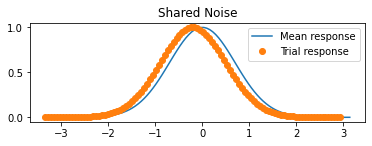

In [506]:
correlation = 1

# # Cross-section of correlation matrix
# plt.subplot(221) 
# corr_mtx = construct_corr_matrix2(correlation, N)
# plt.plot(pref_stims, corr_mtx[50], '-X')
# plt.title('Cross-section of correlation matrix')

# Population response
plt.subplot(212)
# sample population response
stim = 0
mean_pop_res = tuning_curve_theta(pref_stims, stim)
cov_mtx = construct_cov_matrix2(corr_mtx, N)
pop_res = np.random.multivariate_normal(mean_pop_res, cov_mtx)
counter=0
plt.plot(pref_stims, mean_pop_res, label='Mean response')
# for p in pref_stims:
#     pref_stims[counter]+=np.random.normal(0, .1)
#     counter+=1
plt.plot(pref_stims-.2, pop_res, 'o', label='Trial response')

plt.legend()
plt.title('Shared Noise')

In [490]:
def construct_corr_matrix2(correlation, N):
    return correlation*np.ones((N,N))-np.ones((N,N))
def construct_cov_matrix2(corr_mtx, N):
    stds_mtx = .2 * np.eye(N) # matrix of standard deviations
    return np.dot(stds_mtx, np.dot(corr_mtx, stds_mtx))

sigma_s -0.4537664397395722


C:\Users\kevak\AppData\Local\Temp/ipykernel_18528/1388363957.py:13: RuntimeWarning: covariance is not positive-semidefinite.
  pop_res = np.random.multivariate_normal(mean_pop_res, cov_mtx)


Text(0.5, 1.0, 'Population response')

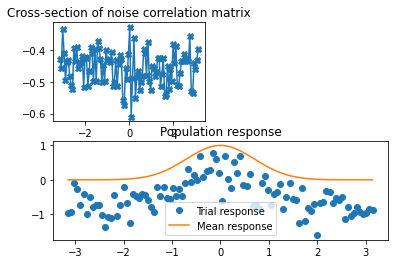

In [483]:
# Cross-section of correlation matrix
plt.subplot(221) 
corr_mtx = modify_matrix(construct_corr_matrix2(correlation, 100))
plt.plot(pref_stims, corr_mtx[50], '-X')
plt.title('Cross-section of noise correlation matrix')

# Population response
plt.subplot(212)
# sample population response
stim = 0
mean_pop_res = tuning_curve_theta(pref_stims, stim)
cov_mtx = construct_cov_matrix2(corr_mtx, 100)
pop_res = np.random.multivariate_normal(mean_pop_res, cov_mtx)
plt.plot(pref_stims, pop_res, 'o', label='Trial response')
plt.plot(pref_stims, mean_pop_res, label='Mean response')
plt.legend()
plt.title('Population response')

In [23]:
def Info(N):
    N=int(N)
    pref_stims = np.linspace(-np.pi, np.pi, int(N))
    counter=1
    fprimelist=[]
    stim = 0
    mean_pop_res = tuning_curve_theta(pref_stims, stim)
    corr_mtx = modify_matrix(construct_corr_matrix2(0.2, N))
    cov_mtx = construct_cov_matrix2(corr_mtx, N)
    for i in mean_pop_res:
        fprime=(mean_pop_res[counter]-i)/(np.abs(pref_stims[1]-pref_stims[0]))
        fprimelist.append(fprime)
    f=np.array(fprimelist)
    info=np.transpose(f)*(np.linalg.inv(cov_mtx))*f
    information=np.sum(info)
    return information

In [543]:
max_corr = 1.0
corr_length = 0.35

def Info(N, max_corr):
    N=int(N)
    pref_stims = np.linspace(-np.pi, np.pi, int(N))
    PREF_ANG_DISTS = pref_stims - pref_stims[:,None]
    PREF_ANG_DISTS = np.absolute(PREF_ANG_DISTS)
    counter=1
    fprimelist=[]
    stim = 0
    mean_pop_res = tuning_curve_theta(pref_stims, stim)
    corr_mtx = construct_corr_matrix(max_corr, corr_length, PREF_ANG_DISTS, N)
    corr_mtx=modify_matrix(corr_mtx)
    cov_mtx = construct_cov_matrix(max_corr, corr_length, PREF_ANG_DISTS, N)
    for i in mean_pop_res:
        fprime=(mean_pop_res[counter]-i)/(np.abs(pref_stims[1]-pref_stims[0]))
        fprimelist.append(fprime)
    f=np.array(fprimelist)
    info=np.transpose([f])*(np.linalg.inv(cov_mtx))*f
    information=np.sum(info)
    return information/N**2

In [521]:
def Infograph(max_corr):
    max_corr = max_corr
    pop = np.linspace(2, 100, 99)
    Ilist=[]
    for p in pop:
        Ilist.append(Info(p, max_corr))
    return Ilist

Text(0.5, 0, 'Population')

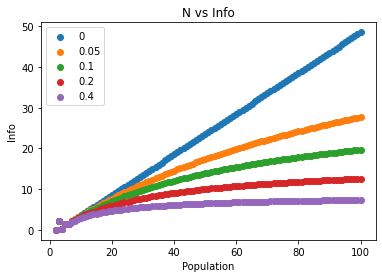

In [561]:
Ilist0=Infograph(0)
Ilist1=Infograph(0.05)
Ilist2=Infograph(0.1)
Ilist3=Infograph(0.2)
Ilist4=Infograph(0.4)

Nlist=np.linspace(2, 100, 99)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Nlist, Ilist0)
ax.scatter(Nlist, Ilist1)
ax.scatter(Nlist, Ilist2)
ax.scatter(Nlist, Ilist3)
ax.scatter(Nlist, Ilist4)
ax.legend(['0','0.05','0.1','0.2','0.4'])
ax.set_title("N vs Info")
ax.set_ylabel('Info')
ax.set_xlabel('Population')

Text(0.5, 0, 'Population')

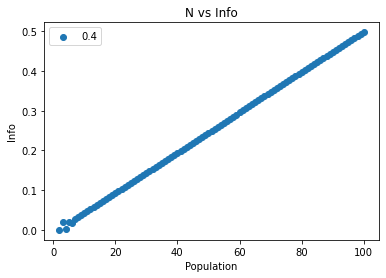

In [555]:
Ilist4=Infograph(0.4)

Nlist=np.linspace(2, 100, 99)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Nlist, Ilist4)
ax.legend(['0.4'])
ax.set_title("N vs Info")
ax.set_ylabel('Info')
ax.set_xlabel('Population')

In [562]:
j=[]

In [567]:
j.append(Infograph(0.4))

Text(0.5, 0, 'Population')

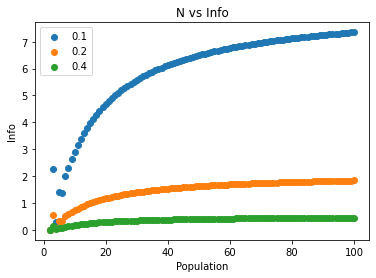

In [568]:
Ilist0=j[0]
Ilist1=j[1]
Ilist2=j[2]

Nlist=np.linspace(2, 100, 99)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Nlist, Ilist0)
ax.scatter(Nlist, Ilist1)
ax.scatter(Nlist, Ilist2)
ax.legend(['0.1','0.2','0.4'])
ax.set_title("N vs Info")
ax.set_ylabel('Info')
ax.set_xlabel('Population')

In [427]:
Tau=20
V=-75
V_reset=-75
V_th=-55
E_L=-75
tmin=0
timestep=0.01
tmax=2000
I=20

In [569]:
pop = np.linspace(2, 400, 5)
variancelist=[]
meanlist=[]
Nlist=[]
sigma_s=np.random.normal(0, 3) #shared noise generated once
sigma_i=4.5 #independent noise generated every time
for p in pop:
    N=int(p)
    Nlist.append(N)
    VV=[]
    tmin=0
    spikes=0
    spikeslist=[]
    while tmin<(tmax-timestep):
        #g=tuning_curve_theta(stim, stim)
        V=V+timestep/Tau*((-V+E_L)+I+np.random.normal(0, sigma_i)+sigma_s)
        if V>V_th:
            VV.append(V_th)
            V=V_reset
            spikes+=1 #tracker for 2.b spiking in bins
        else:
            VV.append(V)
        if (tmin%200<0.01): #at bin size, creates list item of spikes and resets counter
            spikeslist.append(spikes)
            spikes=0
        tmin+=timestep
    #mean and variance
    mean=sum(spikeslist)/len(spikeslist)
    meanlist.append(mean)
    variance=sum((i-mean)**2 for i in spikeslist)/len(spikeslist)
    variancelist.append(variance)

In [570]:
print (meanlist)

[0.0, 0.0, 0.0, 0.0, 0.0]


Text(0.5, 0, 'Time')

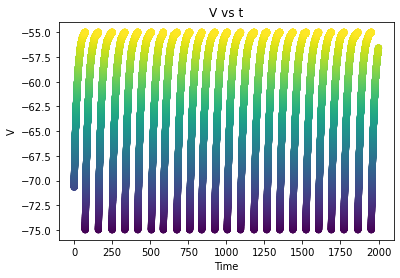

In [449]:
T=np.linspace(0, 2000, 200000)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(T, VV, c=VV)
ax.set_title("V vs t")
ax.set_ylabel('V')
ax.set_xlabel('Time')

Text(0.5, 0, 'Population')

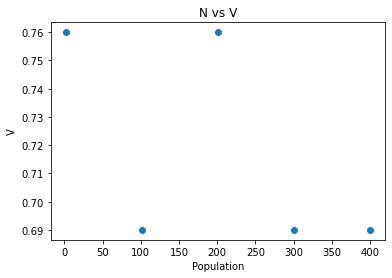

In [450]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Nlist, variancelist)
ax.set_title("N vs V")
ax.set_ylabel('V')
ax.set_xlabel('Population')

Text(0.5, 0, 'Population')

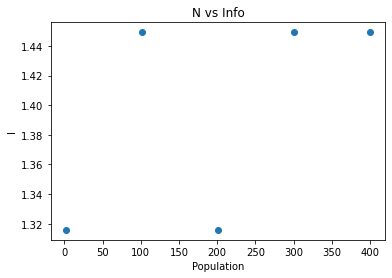

In [451]:
Infolist=1/np.array(variancelist)
#Infolist_t=1/np.array(variancelist)**2/tmax

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Nlist, Infolist)
ax.set_title("N vs Info")
ax.set_ylabel('I')
ax.set_xlabel('Population')

Text(0.5, 0, 'Population')

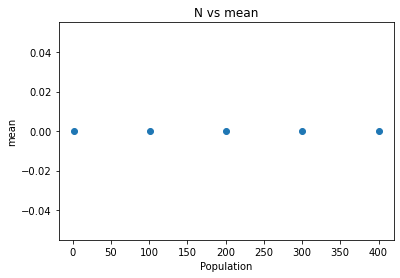

In [447]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Nlist, meanlist)
ax.set_title("N vs mean")
ax.set_ylabel('mean')
ax.set_xlabel('Population')

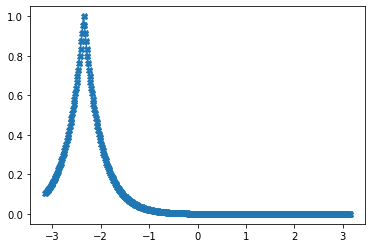

In [322]:
plt.plot(pref_stims, corr_mtx[50], '-X')

In [323]:
print (np.sum(corr_mtx)/N)
print(tuning_curve_theta(stim, stim))

41.98991807508975
1.0


In [324]:
print (variancelist[4])

0.0


In [325]:
print (1/(.4))

2.5


In [326]:
print (I)

-1.019697996593924


In [327]:
print (mexc, minh)

2 3


In [328]:
print (tuning_curve_theta(rng_fire+np.random.normal(0, sigma_i), stim))

0.6198966730873058


In [452]:
#0 is Exc 1 is Inh

def construct_neuron():
    Type=np.random.binomial(1, 0.5)
    preference=np.random.normal(0, np.pi/3)
    #preference=0
    V=0
    return [Type, preference, V, 0]

A=1 #Amplitude
omega=.7 #tuning width

def tuning_curve(pref_stim, stim):
    return A * np.exp( - (stim - pref_stim)**2 / (2 * omega**2) )

def tuning_curve_theta(pref_stim, opening_angle):
    return tuning_curve(pref_stim, opening_angle)

In [458]:
pop = np.linspace(150, 1000, 10)
Tau=20
timestep=1
tmax=200
spikeslist=[]
meanlist=[]
variancelist=[]
Nlist=[]
sigma_s=0.3   #np.random.normal(0, .5) #shared noise generated once
sigma_i=0.1 #independent noise generated every time
for p in pop:
    N=int(p)
    Nlist.append(N)
    Neurons=[]
    for i in range(N):
        new=construct_neuron()
        Neurons.append(new)
    tmin =0
    while tmin<(tmax-timestep):
        stim=0
        
        #cumulative response of all-to-all presynaptic neurons
        for n in Neurons:
            g_of_s=[]
            for k in Neurons:
                g=tuning_curve_theta(k[1]+np.random.normal(0, sigma_i), stim)
                if k[0] == 0:
                    g_of_s.append(g)
                if k[0] == 1:
                    g_of_s.append(-g)
            g_tot=np.sum(g_of_s)-n[1]
            
            #New voltage
            n[2]+=timestep*(-n[2]/Tau+g_tot)
            
            #spike scenario
            if n[2]>1:
                n[3]+=1
                n[2]=0
        if (tmin%20<0.01): #at bin size, creates list item of spikes and resets counter
            for j in Neurons:
                spikeslist.append(j[3])
                j[3]=0    
        tmin+=timestep
    mean=sum(spikeslist)/len(spikeslist)
    meanlist.append(mean)
    variance=sum((i-mean)**2 for i in spikeslist)/len(spikeslist)
    variancelist.append(variance)

Text(0.5, 0, 'Population')

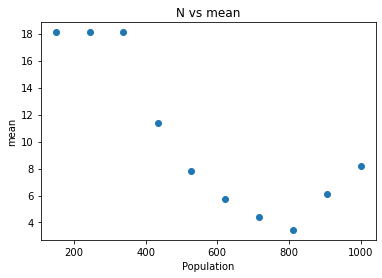

In [459]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Nlist, meanlist)
ax.set_title("N vs mean")
ax.set_ylabel('mean')
ax.set_xlabel('Population')

Text(0.5, 0, 'Population')

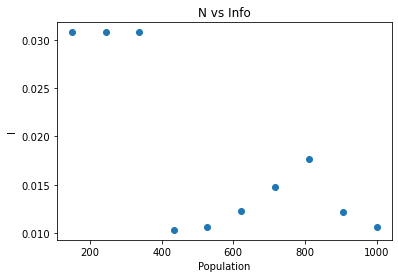

In [460]:
Infolist=1/np.array(variancelist)
#Infolist_t=1/np.array(variancelist)**2/tmax

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Nlist, Infolist)
ax.set_title("N vs Info")
ax.set_ylabel('I')
ax.set_xlabel('Population')

Text(0.5, 0, 'Population')

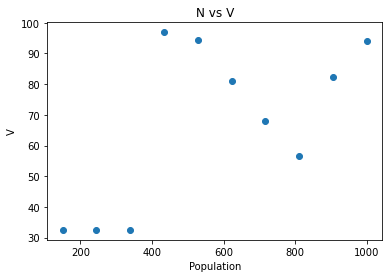

In [461]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Nlist, variancelist)
ax.set_title("N vs V")
ax.set_ylabel('V')
ax.set_xlabel('Population')

In [465]:
print(pref_stims-pref_stims[:,None])

[[ 0.          0.01574733  0.03149466 ...  6.25169064  6.26743798
   6.28318531]
 [-0.01574733  0.          0.01574733 ...  6.23594331  6.25169064
   6.26743798]
 [-0.03149466 -0.01574733  0.         ...  6.22019598  6.23594331
   6.25169064]
 ...
 [-6.25169064 -6.23594331 -6.22019598 ...  0.          0.01574733
   0.03149466]
 [-6.26743798 -6.25169064 -6.23594331 ... -0.01574733  0.
   0.01574733]
 [-6.28318531 -6.26743798 -6.25169064 ... -0.03149466 -0.01574733
   0.        ]]
